# Indicators of wellbeing -  Melbourne

---

### Introduction



In this notebook, I will review the results of a surveys commissioned by the **City of Melbourne** and **Future Melbourne** over a 5 year period (2012-2016). As a resident of Melbourne myself this is something that I am personally interested in understanding more about.

My goal is to quickly get a sense of the highest/lowest results and also to see if there are any large changes in responses throughout the years.

Future Melbourne Community Plan is the City of Melbourne’s premier planning document. It outlines a plan to grow Melbourne as a global, liveable, and sustainable city.

To be able to track Melbourne’s progress according to the aims set out in the Future Melbourne 2008 Plan, City of Melbourne developed and indicators framework including indicators for personal wellbeing and social connection, derived from the Australian Unity wellbeing survey. 

City of Melbourne commissioned a survey of 400 respondents.

Dataset sourced from [Data Vic.](https://discover.data.vic.gov.au)

<br>

---

### Questions

For this dataset, I will look to do some elementary analysis of the survey scores and answer these questions:

- [Q1: Which are the highest response score areas?](#Q1:-Top-Scoring-Responses)
- [Q2: Which are the lowest response score areas?](#Q2:-Bottom-Scoring-Responses)
- [Q3: What areas had scores that were the most volatile?](#Q3:-Most-Volatile-Responses)
- [Q4: From those most volatile responses, what does the trend over time look like?](#Q4:-Trend-of-Volatile-Responses)
- [Q5: What areas had scores that were the least volatile?](#Q5:-Least-Volatile-Responses)
- [Q6: How does daytime and nighttime safety compare across demographics?](#Q6:-Demographic-Impact-On-Safety)

We will aim to answer all these questions and generate some key insights from these results.

---

### Data Preparation

Importing required libraries and data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("indicators.csv")

After importing the data into a dataframe, taking a quick look at the shape and first few rows to get a better understanding of what the data looks like.

In [2]:
print(df.shape)
df.head()

(88, 10)


,Indicator label,Indicator description,Unit,2012,2013,2014,2015,2016,Population,Source
0,Community connectedness (18-35 yrs),How satisfied people are with feeling part of ...,%,65.4,64.5,69.1,68.1,68.0,Resident,Future Melbourne Social Survey
1,Community connectedness (Female),How satisfied people are with feeling part of ...,%,67.9,67.7,71.2,70.8,70.0,Resident,Future Melbourne Social Survey
2,Community connectedness (Male),How satisfied people are with feeling part of ...,%,66.9,69.1,69.5,70.6,67.6,Resident,Future Melbourne Social Survey
3,Community connectedness (36 yrs and over),How satisfied people are with feeling part of ...,%,69.6,71.9,71.4,73.0,69.9,Resident,Future Melbourne Social Survey
4,Community connectedness,How satisfied people are with feeling part of ...,%,67.4,68.4,70.4,70.7,68.9,Resident,Future Melbourne Social Survey


In [3]:
print(df.dtypes)

Indicator label           object
Indicator description     object
Unit                      object
2012                     float64
2013                     float64
2014                     float64
2015                     float64
2016                     float64
Population                object
Source                    object
dtype: object


The data types are already in a good format for this analysis so we don't need to change this.

We do not need to check for duplicates in this dataset. However, we do need to check for null values. 

In [4]:
print(df.isnull().sum())

Indicator label           0
Indicator description     0
Unit                      0
2012                     23
2013                     23
2014                      0
2015                      0
2016                      0
Population                0
Source                    0
dtype: int64


The only columns with null values are the ones with response scores in 2012 and 2013. If we were to change the values of those nulls to zero or drop the rows entirely this would interfere with our analysis. In this case it is completely fine to leave the null values in the dataframe.

---

### Data Manipulation

Removing columns that won't be used in the analysis.

In [5]:
df = df.drop(columns=['Unit','Population','Source'])

For this dataset, let's see if we can identify trends and look at the tails for insights. Adding `standard deviation` and `mean` columns will help us quickly identify any trends.

In [6]:
df['Std_Dev'] = df[['2012', '2013', '2014', '2015', '2016']].std(axis=1).round(2)
df['Avg'] = df[['2012', '2013', '2014', '2015', '2016']].mean(axis=1).round(2)

In addition, since demographic data has been embedded in the `Indicator label` it might be worth using to see if there are significant differences in how different groups responded to different questions. Let's extract the text and put the data into another column.

In [7]:
df['Demographic'] = df['Indicator label'].str.extract(r'(Male|Female|18(?:[-–\s])35 yrs|18(?:[-–\s])39 yrs|36 yrs and over|40 yrs and over)', expand=False)
df['Demographic'] = df['Demographic'].fillna('General')

print(df[['Indicator label','Demographic']].head())

                             Indicator label      Demographic
0        Community connectedness (18-35 yrs)        18-35 yrs
1           Community connectedness (Female)           Female
2             Community connectedness (Male)             Male
3  Community connectedness (36 yrs and over)  36 yrs and over
4                    Community connectedness          General


---

### Data Exploration

In this section we will aim to answer the questions listed above at the beginning of the workbook. We will get a new dataframe that's sorted on the `Avg` column so we can see the highest and lowest values.


In [8]:
average_df = df.sort_values(by='Avg', ascending=False)

---

### Q1: Top Scoring Responses

In [9]:
display(average_df[['Indicator label', 'Demographic', 'Avg']].head())

,Indicator label,Demographic,Avg
39,Perceptions of safety - daytime (18-39 yrs),18-39 yrs,95.40
24,Community acceptance of diverse cultures (Female),Female,95.28
25,Community acceptance of diverse cultures (18-3...,18-35 yrs,95.08
42,Perceptions of safety - daytime (Male),Male,94.83
40,Perceptions of safety - daytime,General,94.57


> The highest response scores appear to be around **daytime safety** and **acceptance of diverse cultures**. Let's keep that in mind for now and continue our exploration.

### Q2: Bottom Scoring Responses

In [10]:
display(average_df[['Indicator label', 'Demographic', 'Avg']].tail())

,Indicator label,Demographic,Avg
74,Food security - eating less (36 yrs and over),36 yrs and over,3.62
68,Food security - running out (Male),Male,3.36
71,Food security - running out,General,3.24
72,Food security - running out (Female),Female,3.06
70,Food security - running out (36 yrs and over),36 yrs and over,2.42


> The lowest response scores are mainly in areas related to **food security**, where lower scores indicate a more favorable outcome due to the way the questions are framed.

Since the bottom responses are very similar in terms of label and values, let's dive a bit deeper and compare if food security changes based on **demographic**, we can use `Total Food insecurity` for comparison since it encompassses all of the food security category.

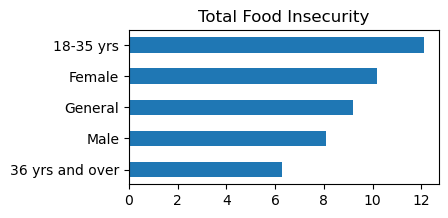

In [11]:
tfi_average_df = average_df[average_df['Indicator label'].str.contains(r'Total Food insecurity.*', case=False, na=False)]

plt.figure(figsize=(4, 2))
plt.barh(tfi_average_df['Demographic'],tfi_average_df['Avg'], height=0.5)
plt.title('Total Food Insecurity')
plt.gca().invert_yaxis()
plt.show()

> This data shows us that the most food insecure demographic is the `18-35 yrs` old group. This is interesting as the least food insecure group is the `36 yrs and over` group. The difference is approximately double (Approximately 6% vs 12%) suggesting that of those surveyed as they became older, food security improved.


### Q3: Most Volatile Responses

In [12]:
std_df = df.sort_values(by='Std_Dev', ascending=False)
display(std_df[['Indicator label', 'Demographic', 'Std_Dev']].head())

,Indicator label,Demographic,Std_Dev
33,Perceptions of safety - night time (Female),Female,11.55
34,Perceptions of safety - night time (40 yrs and...,40 yrs and over,11.25
15,Quality of public spaces and places (Males),Male,8.16
16,Quality of public spaces and places,General,8.06
17,Quality of public spaces and places (Females),Female,7.88


> The most volatile responses come from **night time safety** and **quality of public spaces**. Earlier, in Q1 we saw that the top scoring responses were in **day time safety** so it is interesting to see. Let's see how that looks below.

### Q4: Trend of Volatile Responses

Let's graph the yearly values on a line chart so we can see how the volatile categories are trending. 

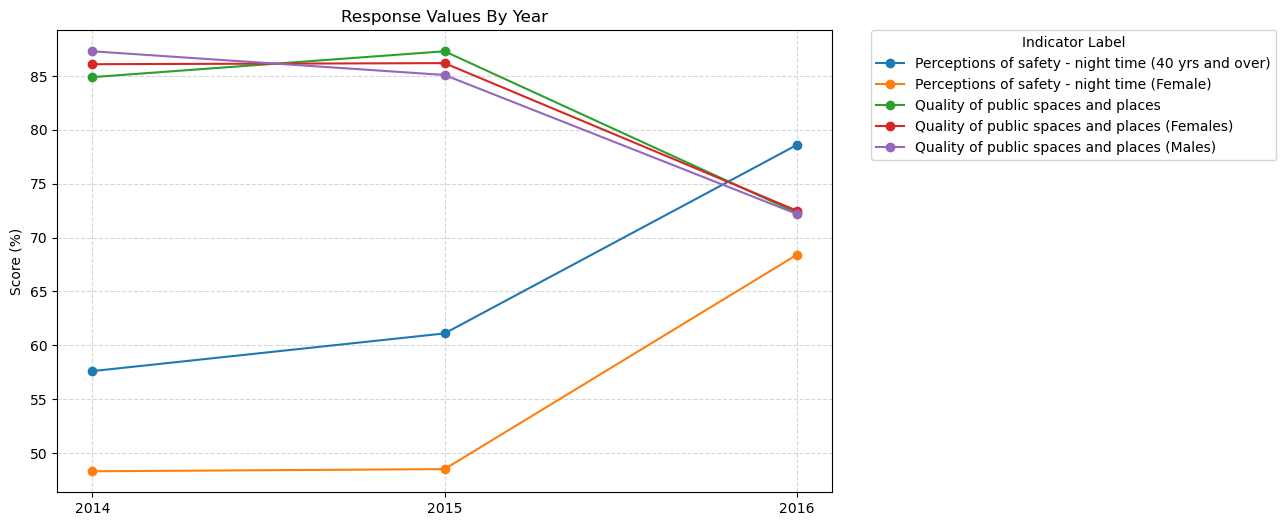

In [13]:
melted_df = std_df.head().melt(id_vars=['Indicator label'], 
                    value_vars=['2012', '2013', '2014', '2015', '2016'],
                    var_name='Year', 
                    value_name='Value')

plt.figure(figsize=(10, 6))
for label, grp in melted_df.groupby('Indicator label'):
    plt.plot(grp['Year'], grp['Value'], marker='o', label=label)

plt.title('Response Values By Year')
plt.ylabel('Score (%)')
plt.legend(title='Indicator Label', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.show()

> The graph shows some clear trends, for night time safety there has been a significant increase in the perception of safety in the `Female` and `40 yrs and over` demographics. On the flip side, the **quality of public spaces and places** has decreased significantly across multiple demographics. Because this is only over a three-year period it could be an outlier, so it would be worth seeing results in future to see if the trends continue or not.

### Q5: Least Volatile Responses

In [14]:
display(std_df[['Indicator label', 'Demographic', 'Avg','Std_Dev']].tail())

,Indicator label,Demographic,Avg,Std_Dev
82,Food security - worried about running out (18-...,18-35 yrs,9.34,0.55
87,Quality of life,General,76.50,0.52
12,How safe you feel (Male),Male,82.74,0.45
77,Food security - eating less (18-35 yrs),18-35 yrs,6.26,0.44
13,Standard of living,General,81.24,0.40


> These response scores are the ones that have changed the least over the years. In effect, respondents don't feel that these particular categories have changed at all. What's noteworthy is that whilst the standard deviation is low for all, the response score is different for each category.

### Q6: Demographic Impact On Safety

Let's go back to the top scoring responses, `perceptions of safety` scored the highest overall. Let's compare the daytime and nighttime scores across demographics and see if there are any insights we can draw. Given the way the data is formatted, let's take two new dataframes and use the `.str.contains()` function to isolate the labels for day and night.

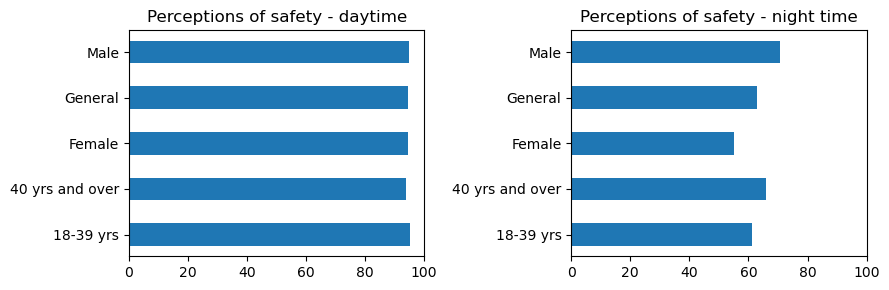

In [15]:
posd_average_df = average_df[average_df['Indicator label'].str.contains(r'perceptions of safety - daytime.*', case=False, na=False)].sort_values('Demographic')
posn_average_df = average_df[average_df['Indicator label'].str.contains(r'perceptions of safety - night.*', case=False, na=False)].sort_values('Demographic')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))

ax1.barh(posd_average_df['Demographic'], posd_average_df['Avg'], height=0.5)
ax1.set_title('Perceptions of safety - daytime')

ax2.barh(posn_average_df['Demographic'], posn_average_df['Avg'], height=0.5)
ax2.set_title('Perceptions of safety - night time')
ax2.set_xlim(0,100)

plt.tight_layout()  
plt.show()

> There is a clear difference between daytime perception of safety and night time. Across all demographics there is a significant decline in safety perception at night. Daytime safety perception was very similar across the demographics but at night time there seems to be larger gaps between the demographics. The `Female` (55) group scored the lowest and this was contrasted my the `Male` (71) group which was the highest.

---

### Bonus Analysis: Boxplots By Demographic

Since we have demographic data, it would be interesting to see how the responses to the surveys differed by demographic.

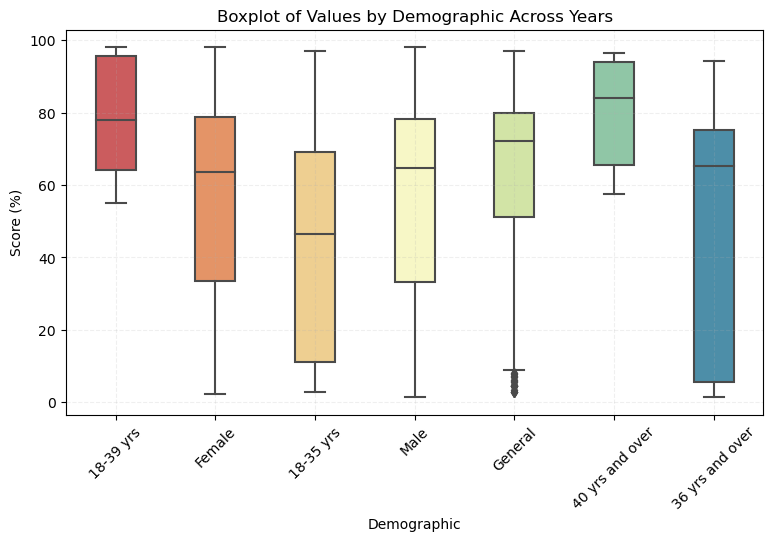

In [54]:
# Melt the DataFrame to long format if not done already
box_melted_df = average_df.melt(id_vars=['Indicator label', 'Demographic'], 
                            value_vars=['2012', '2013', '2014', '2015', '2016'],
                            var_name='Year', 
                            value_name='Value')

# Create a vertical boxplot grouped by Demographic
plt.figure(figsize=(9, 5))
sns.boxplot(data=box_melted_df, x='Demographic', y='Value', width=0.4, palette='Spectral')
plt.title('Boxplot of Scores by Demographic Across Years')
plt.ylabel('Score (%)')
plt.xticks(rotation=45)  # Rotates x-axis labels for better readability
plt.grid(visible=True, linestyle='--', alpha=0.2)
plt.show()


From these results you can see that `Female` and `Male` demographics actually had similar boxplots. `40 yrs and over` and `18-39 yrs` had much higher scores on average. Whereas the `18-35 yrs` had the lowest average but similar to `36 yrs and over` had much larger interquartile ranges.

---

### Conclusion:

- The highest scoring areas were around daytime safety and community acceptance of diverse cultures
- The lowest scoring areas were all around food security
- The biggest changes in scoring year on year were in the nighttime safety and quality of public spaces
- The areas with the least amount of change year on year were quality of life, standard of living and food security
- There are differences in responses when grouped by demographic, nighttime safety for Female vs Male were very different

#### Limitations:
The dataset contained limited responses for certain demographics and did not have all demographics for all responses. The study only surveyed 400 respondents in a short time window of the day, which could cause response bias.

#### Links:

- DataVic - https://discover.data.vic.gov.au
- Future Melbourne - https://participate.melbourne.vic.gov.au/future
- Github - https://github.com/danstands
- LinkedIn - https://www.linkedin.com/in/dhn07/
